In [1]:
import pandas as pd

df = pd.read_csv('data/FXStabilizer_EUR - Turbo.csv')
df

,Open Date,Close Date,Symbol,Action,Units/Lots,Open Price,Close Price,Commission,Swap,Pips,...,Drawdown,Risk:Reward,Max(pips),Max(USD),Min(pips),Min(USD),Entry Accuracy(%),Exit Accuracy(%),ProfitMissed(pips),ProfitMissed(USD)
0,08/01/2025 15:35,08/01/2025 17:28,EURUSD,Sell,0.02,1.15808,1.15377,-0.2,0.00,43.1,...,32.9,0.08,43.3,8.66,-3.6,-0.72,92.3,99.6,-0.2,-0.04
1,08/01/2025 14:53,08/01/2025 17:28,EURUSD,Sell,0.01,1.15557,1.15377,-0.1,0.00,18.0,...,44.1,1.58,18.2,1.82,-28.7,-2.87,38.8,99.6,-0.2,-0.02
2,08/01/2025 14:45,08/01/2025 17:28,EURUSD,Sell,0.01,1.15300,1.15377,-0.1,0.00,-7.7,...,54.4,54.64,0.0,0.00,-54.4,-5.44,0.0,85.8,-7.7,-0.77
3,07/30/2025 21:03,08/01/2025 14:31,EURUSD,Buy,0.08,1.14223,1.14667,-0.8,-3.89,44.4,...,64.7,0.48,59.6,47.68,-28.6,-22.88,67.6,82.8,-15.2,-12.16
4,07/30/2025 20:45,08/01/2025 14:31,EURUSD,Buy,0.04,1.14565,1.14667,-0.4,-1.95,10.2,...,64.7,2.47,25.4,10.16,-62.8,-25.12,28.8,82.8,-15.2,-6.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4947,04/05/2016 17:35,04/06/2016 10:17,EURUSD,Sell,0.01,1.13890,1.13440,0.0,0.01,45.0,...,7.4,0.15,45.0,4.50,-6.8,-0.68,86.9,100.0,0.0,0.00
4948,04/05/2016 09:15,04/05/2016 17:34,EURUSD,Buy,0.04,1.13480,1.13930,0.0,0.00,45.0,...,16.3,0.02,45.0,18.00,0.0,0.00,100.0,100.0,0.0,0.00
4949,04/04/2016 08:56,04/05/2016 17:34,EURUSD,Buy,0.02,1.13730,1.13930,0.0,-0.10,20.0,...,50.3,0.58,31.9,6.38,-18.4,-3.68,63.4,76.3,-11.9,-2.38
4950,04/04/2016 05:00,04/05/2016 17:34,EURUSD,Buy,0.01,1.13980,1.13930,0.0,-0.05,-5.0,...,46.3,12.63,3.4,0.34,-42.9,-4.29,7.3,81.9,-8.4,-0.84


In [2]:
df["Open Date"].min()

'01/06/2023 21:30'

In [3]:
df.columns

Index(['Open Date', 'Close Date', 'Symbol', 'Action', 'Units/Lots',
       'Open Price', 'Close Price', 'Commission', 'Swap', 'Pips', 'Profit',
       'Gain', 'Duration (DD:HH:MM:SS)', 'Profitable(%)',
       'Profitable(time duration)', 'Drawdown', 'Risk:Reward', 'Max(pips)',
       'Max(USD)', 'Min(pips)', 'Min(USD)', 'Entry Accuracy(%)',
       'Exit Accuracy(%)', 'ProfitMissed(pips)', 'ProfitMissed(USD)'],
      dtype='object')

In [4]:
import datetime

buy_trades = df[df['Action'] == 'Buy']
durations = buy_trades['Duration (DD:HH:MM:SS)'].dropna()

def duration_to_seconds(duration_str):
    dd, hh, mm, ss = map(int, duration_str.split(':'))
    return dd*86400 + hh*3600 + mm*60 + ss

seconds = durations.apply(duration_to_seconds)
median_seconds = seconds.median()

median_duration = str(datetime.timedelta(seconds=int(median_seconds)))
print("Median trade duration for Buy trades:", median_duration)

Median trade duration for Buy trades: 21:26:06


/var/folders/wq/5r6js2g51j3_3fb1s5zd343w0000gn/T/ipykernel_35450/2001645626.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('EURUSD=X',interval="1m", period="max")
[*********************100%***********************]  1 of 1 completed
/Users/jguese/code/myfxbookcopying/.venv/lib/python3.12/site-packages/ta/trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2


<Axes: xlabel='Datetime'>

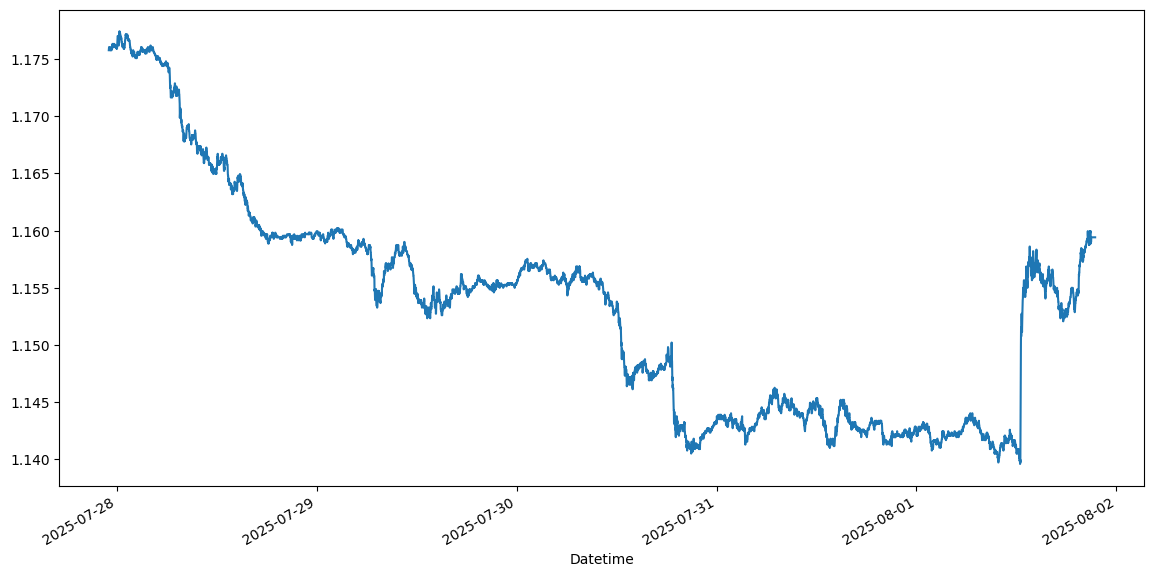

In [5]:
import yfinance as yf
from ta import add_all_ta_features
import matplotlib.pyplot as plt

data = yf.download('EURUSD=X',interval="1m", period="max")
# swap multilevel index
data = data.swaplevel(axis=1)
data = data["EURUSD=X"]
data = add_all_ta_features(data, open="Open", high="High", low="Low", close="Close", volume="Volume")
data = data.ffill().bfill().fillna(0)
data['Close'].plot(figsize=(14, 7))


In [6]:
import numpy as np

# Initialize signal column with zeros
data['signal'] = 0

def nearest_slot(ts, slots):
    # Find the slot in slots that is closest to ts
    return slots[np.argmin(np.abs(slots - ts))]

for idx, row in df.iterrows():
    if row['Action'] in ['Buy', 'Sell'] and pd.notnull(row['Open Date']) and pd.notnull(row['Close Date']):
        open_dt = pd.to_datetime(row['Open Date'], utc=True)
        close_dt = pd.to_datetime(row['Close Date'], utc=True)
        # Find nearest slot in data.index
        open_slot = nearest_slot(open_dt, data.index)
        close_slot = nearest_slot(close_dt, data.index)
        if row['Action'] == 'Buy':
            data.at[open_slot, 'signal'] = 1
            data.at[close_slot, 'signal'] = -1
        elif row['Action'] == 'Sell':
            data.at[open_slot, 'signal'] = -1
            data.at[close_slot, 'signal'] = 1

data["signal"].value_counts()

signal
 0    7041
 1      15
-1       9
Name: count, dtype: int64

## now that we have signal try to correlate

<Axes: title={'center': 'Trading Signals'}, xlabel='Datetime'>

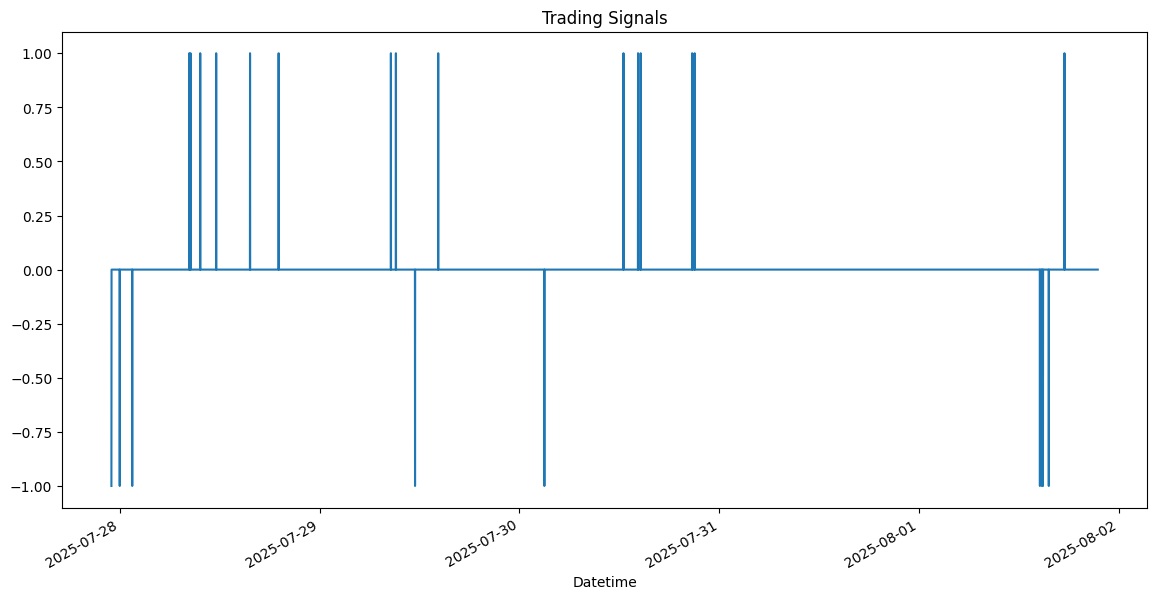

In [7]:
data["signal"].plot(figsize=(14, 7), title="Trading Signals")

## adapt signal

i want to have it at either -1 or 1 depending on the last value until the other appears


<Axes: title={'center': 'Adapted Trading Signal'}, xlabel='Datetime'>

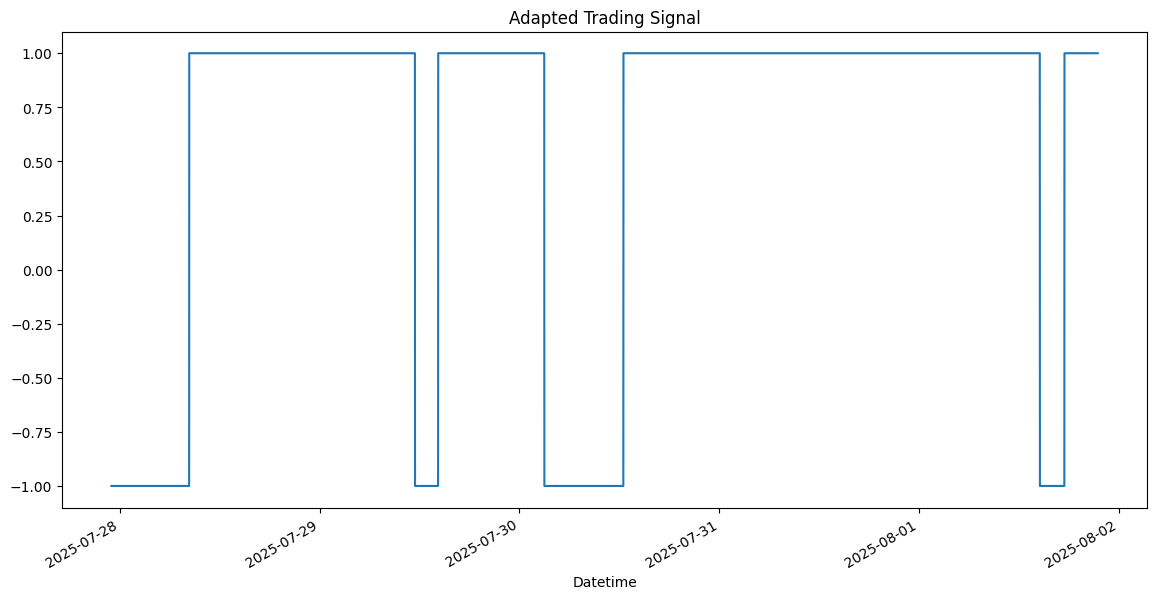

In [8]:
# Adapt signal: fill forward with last non-zero value, then map to -1 or 1
def adapt_signal(series):
    # Replace zeros with NaN, then forward fill
    s = series.replace(0, np.nan).ffill()
    # If still NaN (at start), fill with first non-zero value
    first_nonzero = s.dropna().iloc[0] if not s.dropna().empty else 1
    s = s.fillna(first_nonzero)
    # Map all non-negative to 1, negative to -1
    return np.where(s < 0, -1, 1)

data["adapted_signal"] = adapt_signal(data["signal"])
data["adapted_signal"].plot(figsize=(14, 7), title="Adapted Trading Signal")

## clean signal

if a lot of changes between 1 and -1 are close to another, ignore them to "smoothen" the signal

<Axes: title={'center': 'Cleaned Trading Signal'}, xlabel='Datetime'>

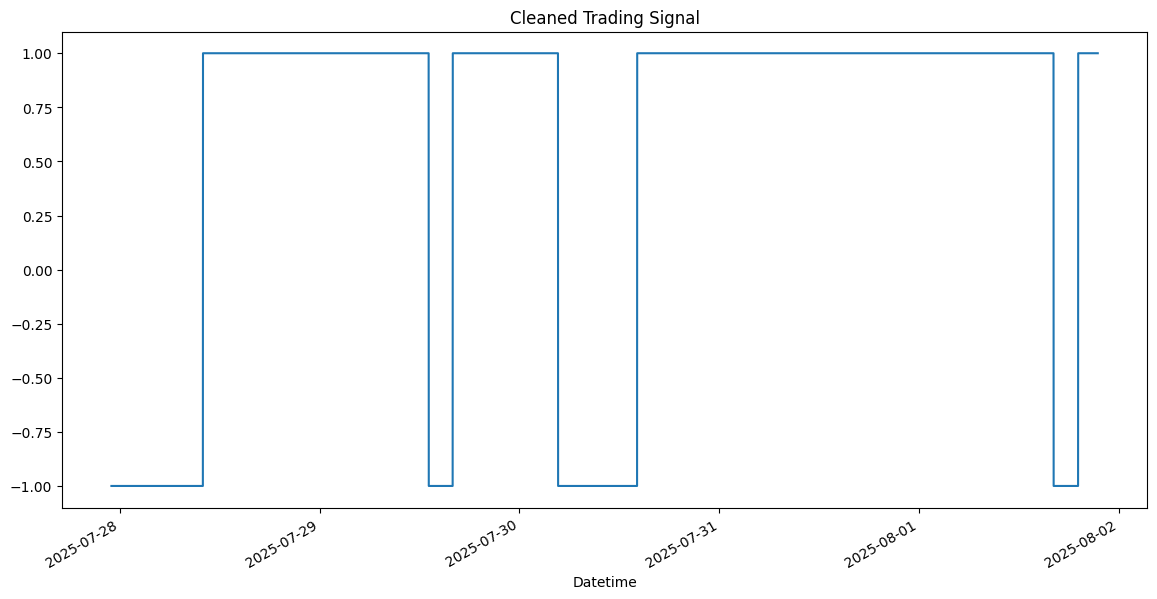

In [9]:
def smooth_signal(signal, min_interval=5):
    smoothed = signal.copy()
    current_value = smoothed.iloc[0]
    pending_value = current_value
    count = 0
    for i in range(1, len(smoothed)):
        if smoothed.iloc[i] != current_value:
            if smoothed.iloc[i] == pending_value:
                count += 1
            else:
                pending_value = smoothed.iloc[i]
                count = 1
            if count >= min_interval:
                current_value = pending_value
                count = 0
        else:
            count = 0
            pending_value = current_value
        smoothed.iloc[i] = current_value
    return smoothed

data["signal"] = smooth_signal(data["adapted_signal"], min_interval=100)
data["signal"].plot(figsize=(14, 7), title="Cleaned Trading Signal")


### finetune signal smoothing

In [10]:
def tradeMetric(trades):
    return np.median(trades) * len(trades) / 100

In [11]:

def oneRun(signalthreshold = 100, startMoney = 10000, signalcolumnname="signal"):
    money = startMoney
    nrStocks = 0
    portfolio = []
    buyHold = []
    boughtAt = 0
    trades = []

    data[signalcolumnname] = smooth_signal(data["adapted_signal"], min_interval=signalthreshold)

    for i in range(len(data)):
        if data[signalcolumnname].iloc[i] == 1 and money > 0:
            # Buy signal
            nrStocks += money / data["Close"].iloc[i]
            money = 0
            boughtAt = data["Close"].iloc[i]
        elif data[signalcolumnname].iloc[i] == -1 and nrStocks > 0:
            # Sell signal
            money += nrStocks * data["Close"].iloc[i]
            nrStocks = 0
            win = data["Close"].iloc[i] - boughtAt
            trades.append(win)
        portfolio.append(money + nrStocks * data["Close"].iloc[i])
        buyHold.append(data["Close"].iloc[i] * startMoney / data["Close"].iloc[0])
    myTradeMetric = tradeMetric(trades)
    return portfolio, buyHold, trades, myTradeMetric

portfolio, buyHold, trades, myTradeMetric = oneRun(signalthreshold=100)
# build a metric which favors high median trades, but also rewards if there are many trades more
print("Final portfolio value:", portfolio[-1])
print("Final buy and hold value:", buyHold[-1])
print("median trade win:", np.median(trades))
print("myTradeMetric:", myTradeMetric)
print("win over buyhold:", portfolio[-1] - buyHold[-1])

Final portfolio value: 10017.823256875374
Final buy and hold value: 9860.868978051532
median trade win: 0.0020003318786621094
myTradeMetric: 6.000995635986328e-05
win over buyhold: 156.95427882384138


In [12]:
from random import randint
from tqdm import tqdm
bestWinOverBuyHold = -1000000
bestTradeMetric = -1000000
bestSettings = dict()

allSims = []

for signalthreshold in tqdm([1,5,8,10, 50, 100, 200, 500] + [randint(1, 1000) for _ in range(100)]):
    portfolio, buyHold, trades, myTradeMetric = oneRun(signalthreshold=signalthreshold)

    allSims.append({
        "signalthreshold": signalthreshold,
        "finalPortfolio": portfolio[-1],
        "finalBuyHold": buyHold[-1],
        "medianTrade": np.median(trades) if trades else 0,
        "myTradeMetric": myTradeMetric,
        "winOverBuyHold": portfolio[-1] - buyHold[-1],
        "nrTrades": len(trades),
    })

    winOverBuyHold = portfolio[-1] - buyHold[-1]
    if myTradeMetric > bestTradeMetric:
        bestTradeMetric = myTradeMetric
        bestSettings = allSims[-1]
print("Best win over buy and hold:", bestTradeMetric)
print("Best settings:", bestSettings) # 575

allSims = pd.DataFrame(allSims)



  7%|▋         | 8/108 [00:01<00:18,  5.48it/s]/Users/jguese/code/myfxbookcopying/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jguese/code/myfxbookcopying/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 108/108 [00:20<00:00,  5.15it/s]

Best win over buy and hold: 0.00011607527732849122
Best settings: {'signalthreshold': 5, 'finalPortfolio': np.float64(10040.928011463373), 'finalBuyHold': np.float64(9860.868978051532), 'medianTrade': np.float64(0.003869175910949707), 'myTradeMetric': np.float64(0.00011607527732849122), 'winOverBuyHold': np.float64(180.05903341184057), 'nrTrades': 3}


best finalPortfolio: 449, 3 trades
best medianTrade with at least 5 trades: 267, 5 trades, winOverBuyHold 51
best myTradeMetric: 5, win over buyhold 71, 25 trades, 10247 usd 
best signalthres 1 performs good as well, 71 winoverbuyhold, 25 trades 

In [15]:
allSims = allSims.sort_values(by="medianTrade", ascending=False)
allSims.head(10)

,signalthreshold,finalPortfolio,finalBuyHold,medianTrade,myTradeMetric,winOverBuyHold,nrTrades
1,5,10040.928011,9860.868978,0.003869,0.000116,180.059033,3
24,15,10031.592004,9860.868978,0.003338,0.000100,170.723026,3
0,1,10024.767446,9860.868978,0.003202,0.000096,163.898468,3
91,50,10023.475679,9860.868978,0.003202,0.000096,162.606701,3
4,50,10023.475679,9860.868978,0.003202,0.000096,162.606701,3
18,16,10021.179133,9860.868978,0.002938,0.000088,160.310155,3
3,10,10036.270880,9860.868978,0.002804,0.000084,175.401902,3
2,8,10037.384779,9860.868978,0.002671,0.000080,176.515801,3
53,58,10009.606660,9860.868978,0.002669,0.000080,148.737682,3
44,67,10011.932952,9860.868978,0.002400,0.000072,151.063974,3


Text(0.5, 1.0, 'Final Portfolio Value vs Signal Threshold')

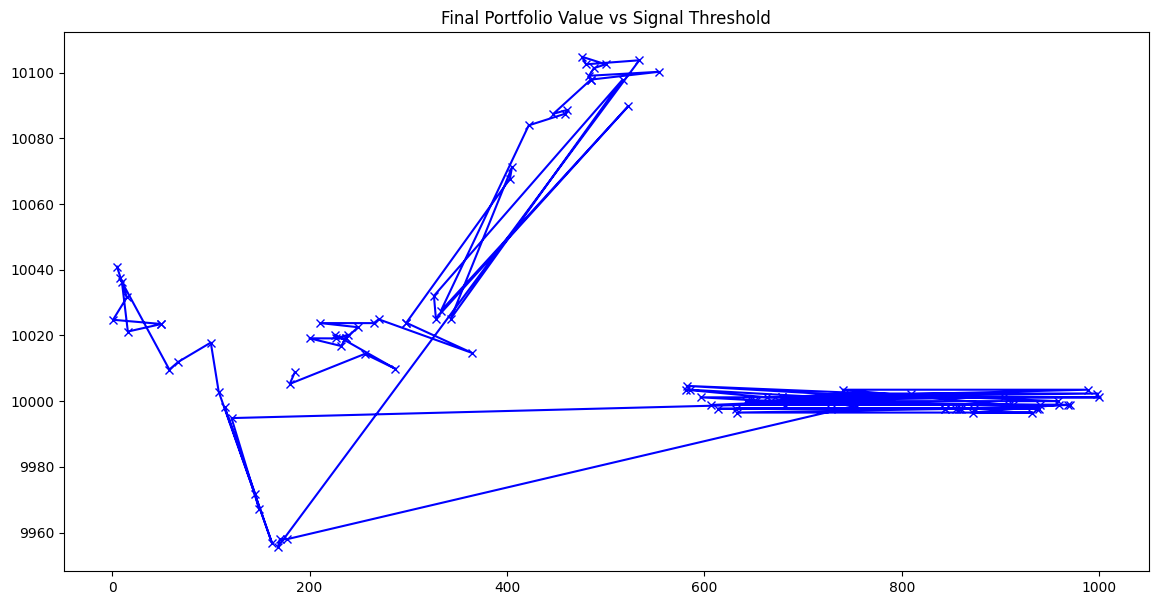

In [16]:
# plot signalthreshold x, finalPortfolio y
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(allSims['signalthreshold'], allSims['finalPortfolio'], marker='x', color='b')
plt.title('Final Portfolio Value vs Signal Threshold')

Text(0.5, 1.0, 'Portfolio Value vs Buy and Hold Value')

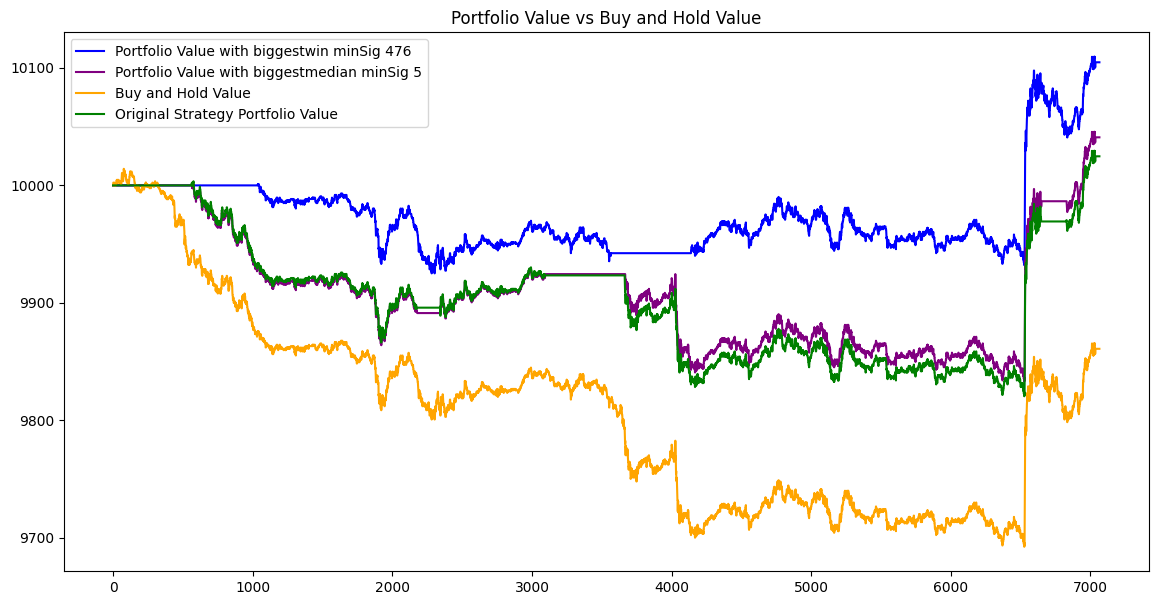

In [21]:
signalThresholdBiggestWin = 476 # 476 biggest win, 5 biggest median trades
signalThresholdBiggestMedianTrades = 5

portfolio, buyHold, trades, myTradeMetric = oneRun(signalthreshold=signalThresholdBiggestWin)
portfolioBiggestMedianTrades, buyHoldBiggestMedianTrades, tradesBiggestMedianTrades, myTradeMetricBiggestMedianTrades = oneRun(signalthreshold=signalThresholdBiggestMedianTrades)
portfolioOriginalStrategy, buyHoldOriginalStrategy, tradesOriginalStrategy, myTradeMetricOriginalStrategy = oneRun(signalthreshold=1)
plt.figure(figsize=(14, 7))
plt.plot(portfolio, label='Portfolio Value with biggestwin minSig ' + str(signalThresholdBiggestWin), color='blue')
plt.plot(portfolioBiggestMedianTrades, label='Portfolio Value with biggestmedian minSig ' + str(signalThresholdBiggestMedianTrades), color='purple')
plt.plot(buyHold, label='Buy and Hold Value', color='orange')
plt.plot(portfolioOriginalStrategy, label='Original Strategy Portfolio Value', color='green')
plt.legend()
plt.title('Portfolio Value vs Buy and Hold Value')

In [22]:
data["signal"] = smooth_signal(data["adapted_signal"], min_interval=476)

# correlations

In [23]:
# Correlation of 'signal' with all other columns
data = data.drop(["adapted_signal"], axis=1)

data.corr()["signal"].sort_values(ascending=False)

Price
signal                   1.000000
trend_macd_signal        0.208644
momentum_ppo_signal      0.207467
trend_macd               0.202721
trend_trix               0.201946
                           ...   
trend_vortex_ind_diff         NaN
trend_mass_index              NaN
momentum_pvo                  NaN
momentum_pvo_signal           NaN
momentum_pvo_hist             NaN
Name: signal, Length: 92, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split

# Example: Use all columns except 'signal' as features, and 'signal' as target
# Map signal values to 0, 1, 2 for classifier compatibility
y_mapped = data['signal'].map({-1: 0, 1: 1})
X = data.drop(columns=['signal'])
y = y_mapped

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
# Remove inf and -inf values from X_train and X_test
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Fill remaining NaNs with 0 (or use another strategy if preferred)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [25]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       300
           1       1.00      1.00      1.00      1113

    accuracy                           1.00      1413
   macro avg       0.99      1.00      0.99      1413
weighted avg       1.00      1.00      1.00      1413

Accuracy: 0.9964614295824487


In [26]:
# Print top 10 feature importances
importances = clf.feature_importances_
feature_names = X_train.columns
top_indices = np.argsort(importances)[::-1][:10]
for i in top_indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")

trend_ichimoku_base: 0.5923
trend_visual_ichimoku_b: 0.1679
volatility_dcl: 0.0974
trend_macd_signal: 0.0391
volatility_bbh: 0.0313
volatility_atr: 0.0280
others_cr: 0.0183
trend_ichimoku_b: 0.0108
trend_adx: 0.0035
momentum_tsi: 0.0018


## reduce tree size

In [27]:
for maxdepth in range(1, 11):
    for maxfeatures in range(1, 11):
        clf = DecisionTreeClassifier(max_depth=maxdepth, max_features=maxfeatures)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(f"Max Depth: {maxdepth}, Max Features: {maxfeatures}")
        # print(classification_report(y_test, y_pred))
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("-" * 50)

# Preferred parameters: {'param_max_depth': 18, 'param_max_features': 19}
# Preferred accuracy: 0.9155456910299452

Max Depth: 1, Max Features: 1
Accuracy: 0.7876857749469215
--------------------------------------------------
Max Depth: 1, Max Features: 2
Accuracy: 0.7898089171974523
--------------------------------------------------
Max Depth: 1, Max Features: 3
Accuracy: 0.7876857749469215
--------------------------------------------------
Max Depth: 1, Max Features: 4
Accuracy: 0.9150743099787686
--------------------------------------------------
Max Depth: 1, Max Features: 5
Accuracy: 0.916489738145789
--------------------------------------------------
Max Depth: 1, Max Features: 6
Accuracy: 0.916489738145789
--------------------------------------------------
Max Depth: 1, Max Features: 7
Accuracy: 0.9157820240622788
--------------------------------------------------
Max Depth: 1, Max Features: 8
Accuracy: 0.916489738145789
--------------------------------------------------
Max Depth: 1, Max Features: 9
Accuracy: 0.916489738145789
--------------------------------------------------
Max Depth: 1, 

In [33]:
clf = DecisionTreeClassifier(max_depth=5) #
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("-" * 50)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       300
           1       0.98      1.00      0.99      1113

    accuracy                           0.98      1413
   macro avg       0.99      0.96      0.97      1413
weighted avg       0.98      0.98      0.98      1413

Accuracy: 0.9823071479122435
--------------------------------------------------


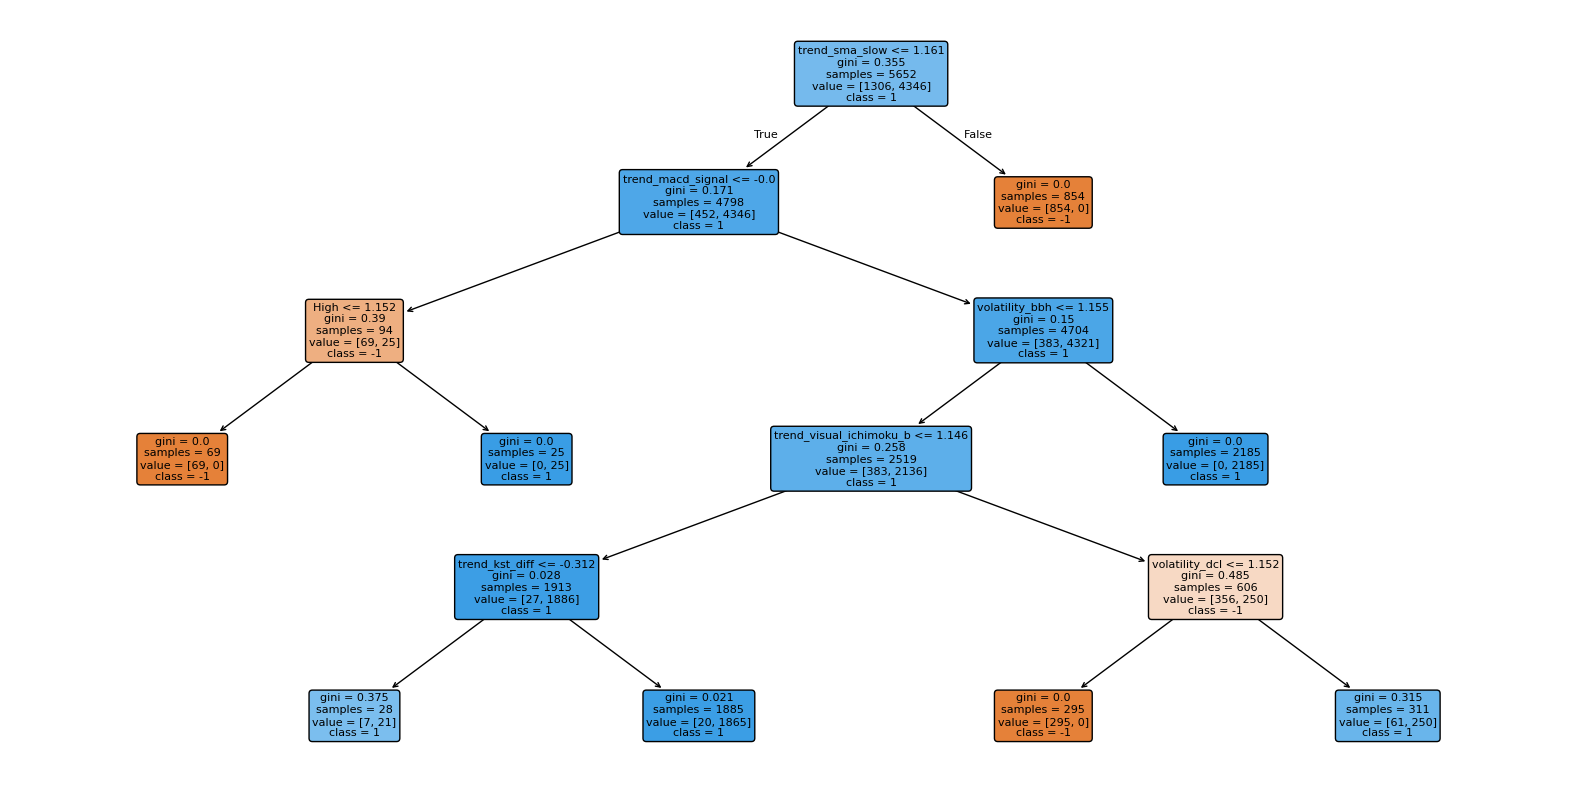

In [34]:
from sklearn import tree

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=feature_names, class_names=['-1', '1'], filled=True, rounded=True, fontsize=8)
plt.show()

In [35]:
from sklearn.tree import export_text

# Export the decision tree as a set of if-else rules
tree_rules = export_text(clf, feature_names=list(feature_names))
print(tree_rules)

|--- trend_sma_slow <= 1.16
|   |--- trend_macd_signal <= -0.00
|   |   |--- High <= 1.15
|   |   |   |--- class: 0
|   |   |--- High >  1.15
|   |   |   |--- class: 1
|   |--- trend_macd_signal >  -0.00
|   |   |--- volatility_bbh <= 1.15
|   |   |   |--- trend_visual_ichimoku_b <= 1.15
|   |   |   |   |--- trend_kst_diff <= -0.31
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- trend_kst_diff >  -0.31
|   |   |   |   |   |--- class: 1
|   |   |   |--- trend_visual_ichimoku_b >  1.15
|   |   |   |   |--- volatility_dcl <= 1.15
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- volatility_dcl >  1.15
|   |   |   |   |   |--- class: 1
|   |   |--- volatility_bbh >  1.15
|   |   |   |--- class: 1
|--- trend_sma_slow >  1.16
|   |--- class: 0



In [38]:
def tree_decision(row):
    if row['trend_sma_slow'] <= 1.16:
        if row['trend_macd_signal'] <= -0.00:
            return -1
        else:  # trend_macd_signal > -0.00
            if row['volatility_bbh'] <= 1.15:
                if row['trend_visual_ichimoku_b'] <= 1.15:
                    # Both branches return 1 regardless of trend_kst_diff
                    return 1
                else:  # trend_visual_ichimoku_b > 1.15
                    if row['volatility_dcl'] <= 1.15:
                        return -1
                    else:
                        return 1
            else:  # volatility_bbh > 1.15
                return 1
    else:  # trend_sma_slow > 1.16
        return -1

In [42]:
data["tree_signal"] = data.apply(tree_decision, axis=1)
data["adapted_signal"] = adapt_signal(data["signal"])

In [49]:
data["tree_signal"].value_counts()

tree_signal
 1    5459
-1    1606
Name: count, dtype: int64

Text(0.5, 1.0, 'Portfolio Value vs Buy and Hold Value')

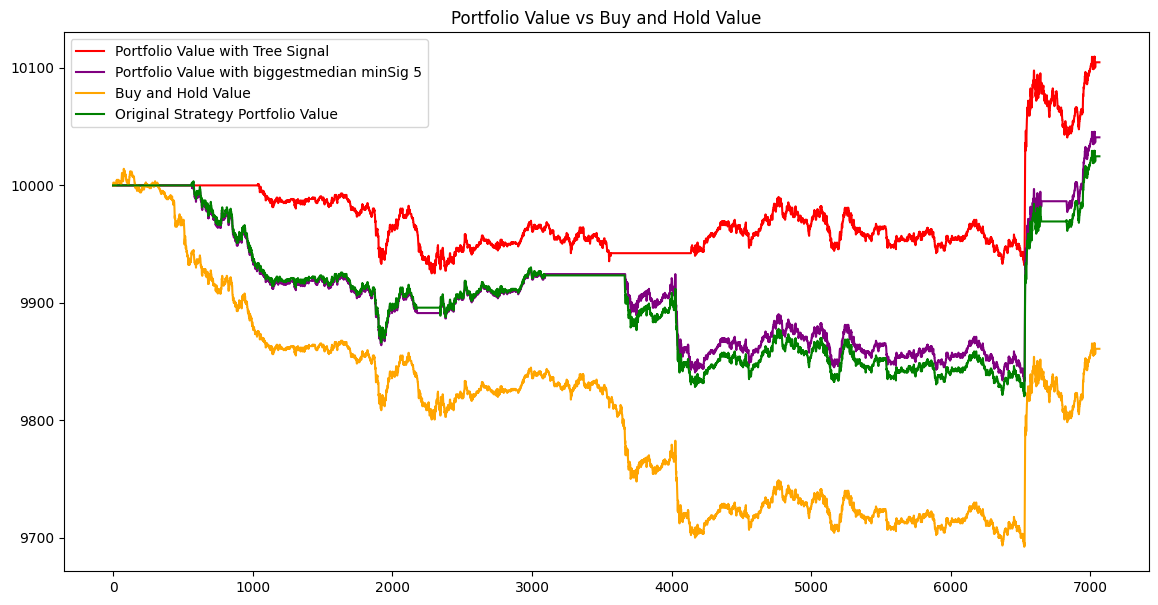

In [50]:
portfolioTree, buyHoldTree, tradesTree, myTradeMetricTree = oneRun(signalthreshold=1, signalcolumnname="tree_signal")


plt.figure(figsize=(14, 7))
plt.plot(portfolioTree, label='Portfolio Value with Tree Signal', color='red')
plt.plot(portfolio, label='Portfolio Value with biggestwin minSig ' + str(signalThresholdBiggestWin), color='blue')
plt.plot(portfolioBiggestMedianTrades, label='Portfolio Value with biggestmedian minSig ' + str(signalThresholdBiggestMedianTrades), color='purple')
plt.plot(buyHold, label='Buy and Hold Value', color='orange')
plt.plot(portfolioOriginalStrategy, label='Original Strategy Portfolio Value', color='green')
plt.legend()
plt.title('Portfolio Value vs Buy and Hold Value')

meaning i have successfully backtracked which values they are using and even improved on it...

### finetuning my tree signal

In [51]:
allResults = []

for i in tqdm([1,5,10,100,200,300] + [randint(1, 1000) for _ in range(100)]):
    portfolioTree, buyHoldTree, tradesTree, myTradeMetricTree = oneRun(signalthreshold=i, signalcolumnname="tree_signal")
    allResults.append({
        "signalthreshold": i,
        "finalPortfolio": portfolioTree[-1],
        "finalBuyHold": buyHoldTree[-1],
        "medianTrade": np.median(tradesTree) if tradesTree else 0,
        "myTradeMetric": myTradeMetricTree,
        "winOverBuyHold": portfolioTree[-1] - buyHoldTree[-1],
        "nrTrades": len(tradesTree),
    })

allResults = pd.DataFrame(allResults)
allResults = allResults.sort_values(by="winOverBuyHold", ascending=False)
allResults.head(10)

  6%|▌         | 6/106 [00:01<00:19,  5.19it/s]/Users/jguese/code/myfxbookcopying/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jguese/code/myfxbookcopying/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 106/106 [00:19<00:00,  5.34it/s]


,signalthreshold,finalPortfolio,finalBuyHold,medianTrade,myTradeMetric,winOverBuyHold,nrTrades
70,29,10106.003789,9860.868978,-0.006693,-0.000067,245.134811,1
28,38,10104.845035,9860.868978,-0.006825,-0.000068,243.976057,1
0,1,10104.817807,9860.868978,-0.006701,-0.000067,243.948829,1
24,59,10103.751398,9860.868978,-0.006551,-0.000066,242.882420,1
37,65,10102.579117,9860.868978,-0.006556,-0.000066,241.710139,1
1,5,10102.525998,9860.868978,-0.006568,-0.000066,241.657020,1
100,20,10100.200896,9860.868978,-0.006963,-0.000070,239.331918,1
2,10,10097.876321,9860.868978,-0.006968,-0.000070,237.007343,1
97,11,10097.862994,9860.868978,-0.007101,-0.000071,236.994016,1
60,90,10095.603291,9860.868978,-0.007481,-0.000075,234.734313,1
